In [223]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [224]:
import numpy as np

from consumption_saving import *

In [225]:
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [226]:
value_function_employment(model.par, model.sol)

In [227]:
model.sol.a_next_e[-1,0,:]

array([-2.        , -1.89473684, -1.78947368, -1.68421053, -1.57894737,
       -1.47368421, -1.36842105, -1.26315789, -1.15789474, -1.05263158,
       -0.94736842, -0.84210526, -0.73684211, -0.63157895, -0.52631579,
       -0.42105263, -0.31578947, -0.21052632, -0.10526316,  0.        ])

In [228]:
print(np.shape(model.par.V_e_t_a))
model.par.V_e_t_a[:,0]

(41, 20)


array([-4.40387073, -4.10604139, -3.82888506, -3.57389867, -3.34273052,
       -3.13720131, -2.95932891, -2.81135775, -2.69579396, -2.61544753,
       -2.57348333, -2.33342818, -2.10759863, -1.89736408, -1.70429058,
       -1.53018137, -1.377129  , -1.2475829 , -1.14443876, -1.07115894,
       -1.03193823, -0.88989002, -0.75587667, -0.63069306, -0.51526078,
       -0.41065894, -0.31816559, -0.23931491, -0.17597808, -0.13048185,
       -0.10578924, -0.10578924, -0.10578924, -0.10578924, -0.10578924,
       -0.10578924, -0.10578924, -0.10578924, -0.10578924, -0.10578924,
       -0.10578924])

In [229]:
print(np.shape(model.par.V_e))
model.par.V_e[-1,:,-1]

(41, 20, 20)


array([ 4.29808149e+00,  3.39878468e+00,  2.63543306e+00,  1.99146391e+00,
        1.45400677e+00,  1.01278358e+00,  6.59405669e-01,  3.86903340e-01,
        1.89399398e-01,  6.18754037e-02, -2.76167977e-17, -2.76167977e-17,
       -2.76167977e-17, -2.76167977e-17, -5.52335955e-17, -5.52335955e-17,
       -5.52335955e-17, -2.76167977e-17, -2.76167977e-17,  0.00000000e+00])

In [230]:
V_u,s = unemployment_ss(model.par, -1,-1)
print(V_u,s)

bellman_difference(-1) = 0.47819289591870207
bellman_difference(1) = -0.3828487297774572
-0.004246656989724669 0.4280816507605078


In [231]:
solve_search_and_consumption(model.par, model.sol)

bellman_difference(-1) = -0.9223445105699644
bellman_difference(1) = -0.9113977121783032
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.9223445105699644, -0.9663723613741338
Trying interval [-5, 0] with function values 0.24379189264671375, -0.9663723613741338
Found valid interval: [-5, 0] with function values 0.24379189264671375, -0.9663723613741338
bellman_difference(-1) = -0.9223445105699644
bellman_difference(1) = -0.9113977121783032
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.9223445105699644, -0.9663723613741338
Trying interval [-5, 0] with function values 0.24379189264671375, -0.9663723613741338
Found valid interval: [-5, 0] with function values 0.24379189264671375, -0.9663723613741338
bellman_difference(-1) = -0.8963557205090682
bellman_difference(1) = -0.9315030980629859
The function 

In [232]:
model.sol.s[-3,:]

array([0.43463953, 0.43463964, 0.42606878, 0.41025345, 0.40203564,
       0.39506287, 0.38810978, 0.38588289, 0.38155498, 0.38108552,
       0.38031221, 0.38006786, 0.37981447, 0.37955605, 0.37929563,
       0.37903473, 0.37877386, 0.37851314, 0.37825259, 0.37799223])

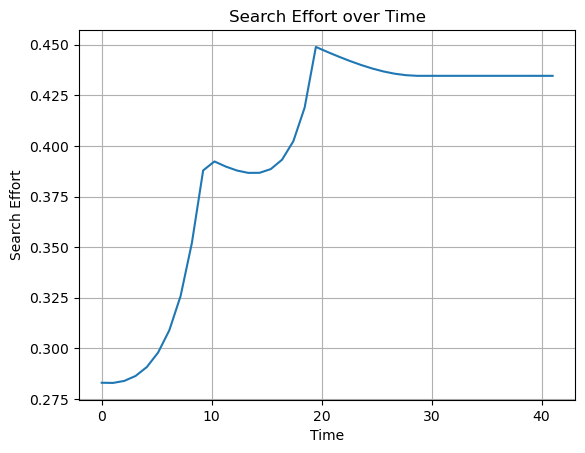

In [233]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0])
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


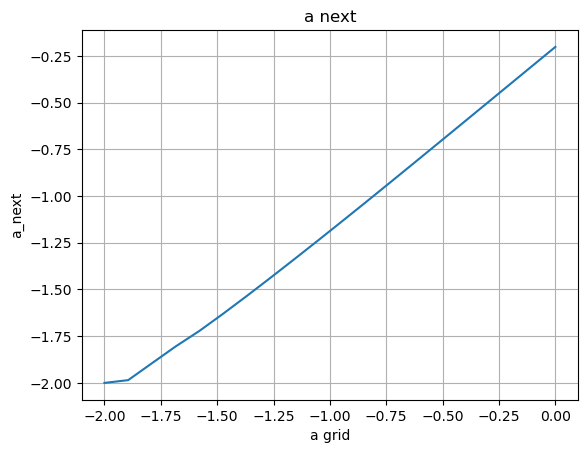

In [234]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:])
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.grid(True)
plt.show()


In [235]:
model1 = model.copy()
# model1.par.L = -0.00
# model1.par.a_grid = np.linspace(model1.par.L, model1.par.A_0, 20)
model1.par.euler = False

In [236]:
value_function_employment(model1.par, model1.sol)

In [237]:
solve_search_and_consumption(model1.par, model1.sol)

bellman_difference(-1) = -0.88108344027152
bellman_difference(1) = -0.9461183573884703
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.88108344027152, -0.9631021488299952
Trying interval [-5, 0] with function values 0.4370163939623808, -0.9631021488299952
Found valid interval: [-5, 0] with function values 0.4370163939623808, -0.9631021488299952
bellman_difference(-1) = -0.88108344027152
bellman_difference(1) = -0.9461183573884703
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.88108344027152, -0.9631021488299952
Trying interval [-5, 0] with function values 0.4370163939623808, -0.9631021488299952
Found valid interval: [-5, 0] with function values 0.4370163939623808, -0.9631021488299952
bellman_difference(-1) = -0.8492512027662134
bellman_difference(1) = -0.9563812629516515
The function does not hav

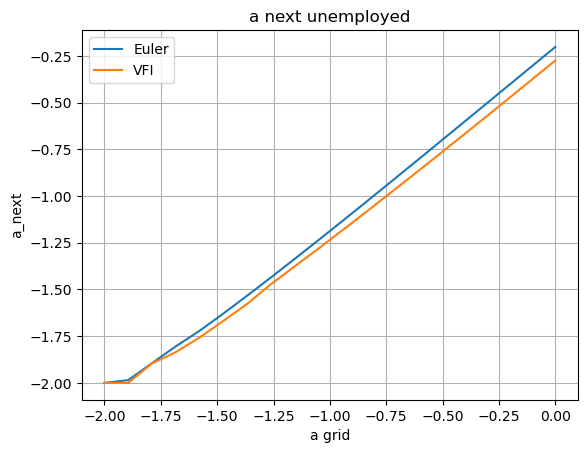

In [238]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.a_next[0,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next unemployed')
plt.legend()
plt.grid(True)
plt.show()


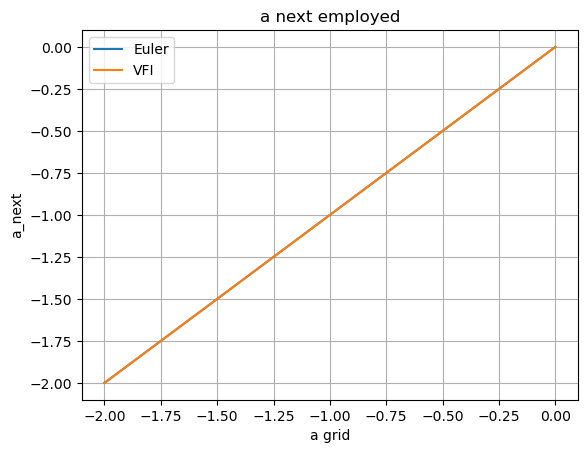

In [239]:

plt.plot(model.par.a_grid, model.sol.a_next_e[-1,3,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.a_next_e[-1,3,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next employed')
plt.legend()
plt.grid(True)
plt.show()

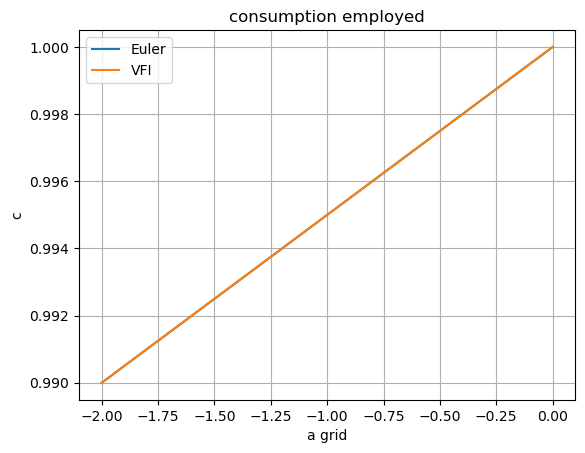

In [240]:
plt.plot(model.par.a_grid, model.sol.c_e[-1,5,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.c_e[-1,5,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('c')
plt.title('consumption employed')
plt.legend()
plt.grid(True)
plt.show()

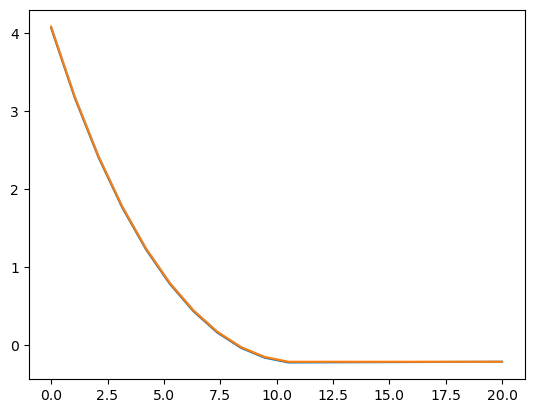

In [241]:
time = np.linspace(0, model1.par.N + model1.par.M, model1.par.N + model1.par.M)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[-1,:,18])
plt.plot(time, model1.par.V_e[-1,:,18])

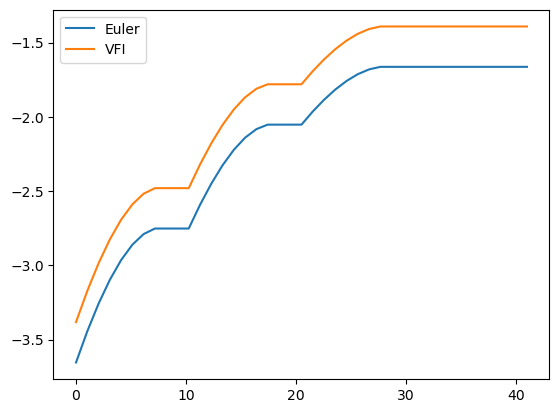

In [242]:
time = np.linspace(0, model1.par.T, model1.par.T)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[:,3,3], label='Euler')
plt.plot(time, model1.par.V_e[:,3,3], label='VFI')
plt.legend()

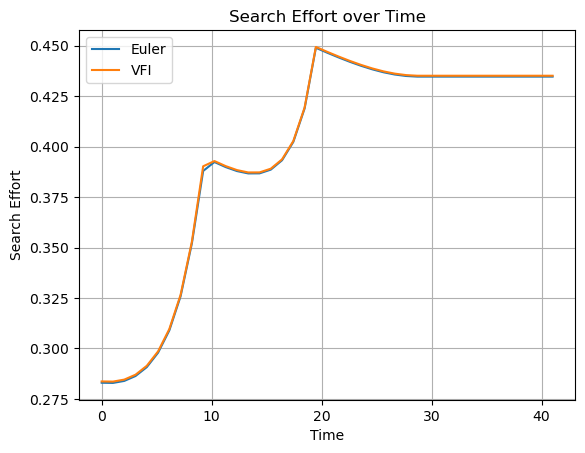

In [243]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0], label='Euler')
plt.plot(time, model1.sol.s[:model1.par.T,0], label='VFI')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

In [244]:
solve_forward(model.par, model.sol, model.sim)

In [245]:
solve_forward(model1.par, model1.sol, model1.sim)

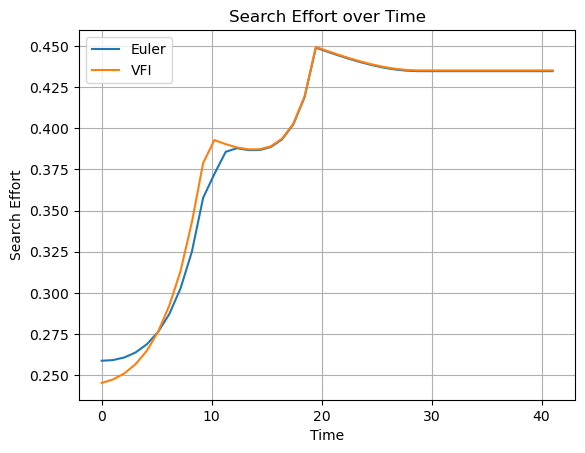

In [246]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s[:model.par.T], label='Euler')
plt.plot(time, model1.sim.s[:model.par.T], label='VFI')

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


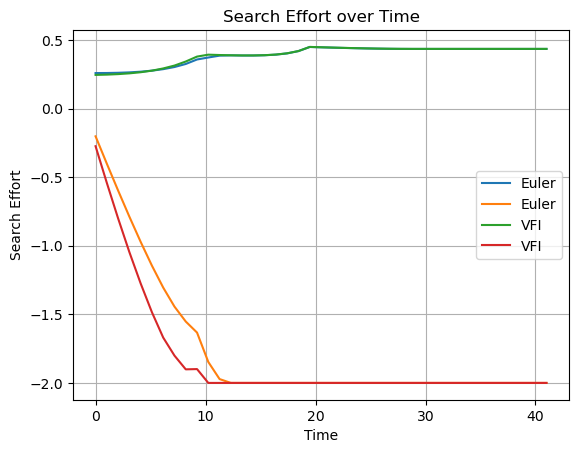

In [247]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s, label='Euler')
plt.plot(time, model.sim.a_next, label='Euler')
plt.plot(time, model1.sim.s, label='VFI')
plt.plot(time, model1.sim.a_next, label='VFI')

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

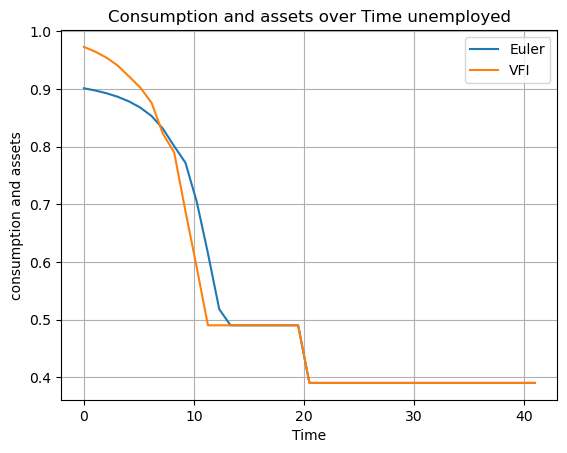

In [248]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.c, label='Euler')
# plt.plot(time, model.sim.a_next, label='Euler')
plt.plot(time, model1.sim.c, label='VFI')
# plt.plot(time, model1.sim.a_next, label='VFI')

plt.xlabel('Time')
plt.ylabel('consumption and assets')
plt.title('Consumption and assets over Time unemployed' )
plt.grid(True)
plt.legend()
plt.show()

In [249]:
solve_forward_employment(model.par, model.sol, model.sim)

In [250]:
solve_forward_employment(model1.par, model1.sol, model1.sim)

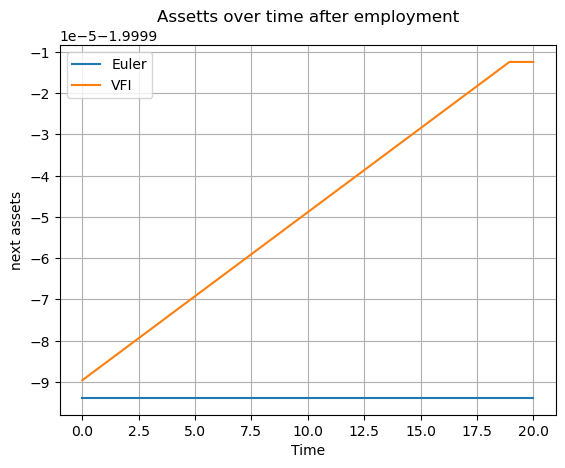

In [251]:
time = np.linspace(0, model.par.N+model.par.M, model.par.N+model.par.M)
plt.plot(time, model.sim.a_e[-1,:], label='Euler')
plt.plot(time, model1.sim.a_e[-1,:], label='VFI')


plt.xlabel('Time')
plt.ylabel('next assets')
plt.title('Assetts over time after employment')
plt.grid(True)
plt.legend()
plt.show()

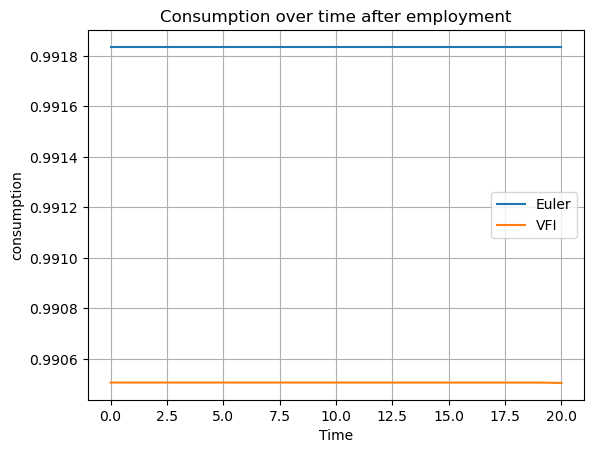

In [252]:
time = np.linspace(0, model.par.N+model.par.M, model.par.N+model.par.M)
plt.plot(time, model.sim.c_e[10,:], label='Euler')
plt.plot(time, model1.sim.c_e[10,:], label='VFI')


plt.xlabel('Time')
plt.ylabel('consumption')
plt.title('Consumption over time after employment')
plt.grid(True)
plt.legend()
plt.show()